In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv(r'/kaggle/input/parkinsons-disease-data-set/parkinsons.data')

# <span style="font-weight: bold; font-style: italic; color: green; text-shadow: 2px 2px 4px #000000;">EDA</span>


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


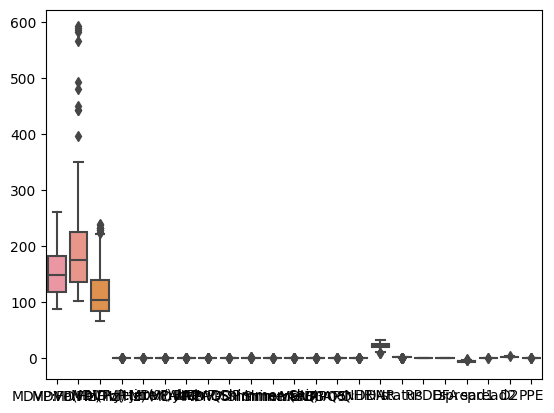

In [5]:
sns.boxplot(data)
plt.show()

In [6]:
data.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# <span style="font-weight: bold; font-style: italic; color: green; text-shadow: 2px 2px 4px #000000;">Data Preparation</span>


In [7]:
data = data.drop(columns='name')

In [8]:
def vectorizer(df):
    vc = CountVectorizer()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = vc.fit_transform(df[col]).toarray()
            
    return df

In [9]:
data = vectorizer(data)

In [10]:
# def normalizer(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1
#     upper_bound = Q3 + 1.5 * IQR
#     lower_bound = Q1 - 1.5 * IQR
#     for col in data.columns:
#         data[col] = data[col].apply(lambda x:upper_bound[col] if x > upper_bound[col] else (lower_bound[col] if x < lower_bound[col] else x))
#     return data

In [11]:
# data = normalizer(data)

# <span style="font-weight: bold; font-style: italic; color: green; text-shadow: 2px 2px 4px #000000;">Model Building</span>


In [12]:
X = data.drop(columns='status')
y = data['status']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

In [14]:
model = Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier())])

In [15]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [16]:
y_pred = model.predict(X_test)

# <span style="font-weight: bold; font-style: italic; color: green; text-shadow: 2px 2px 4px #000000;">Model Performance Evaluation</span>


In [17]:
acc = accuracy_score(y_test, y_pred)
creport = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [18]:
print(f'Deqiqlik:\n{acc*100:.0f}%\nTesnifat Hesabati:\n{creport}')

Deqiqlik:
95%
Tesnifat Hesabati:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



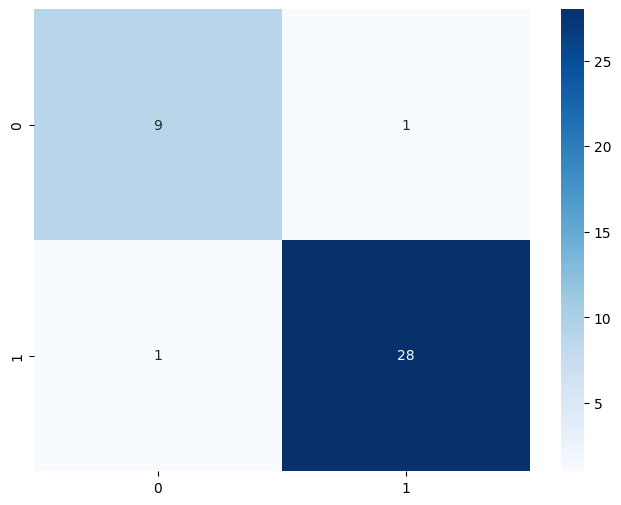

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

# <span style="font-weight: bold; font-style: italic; color: green; text-shadow: 2px 2px 4px #000000;">Summary</span>

### 1. **Exploratory Data Analysis**
   - The dataset is loaded from the `parkinsons.data` file.
   - The `data.info()` and `data.describe()` methods are used to inspect the general characteristics of the data (e.g., data types and basic statistics).
   - A boxplot is generated using `sns.boxplot()` to visualize outliers in the data.

### 2. **Data Preparation**
   - The `vectorizer()` function uses `TfidfVectorizer` to convert text data into numerical form. It applies this transformation to any column with the datatype 'object'.
   - The `normalizer()` function, although commented out, is designed to normalize the data using the interquartile range method (IQR).

### 3. **Model Building**
   - Features (`X`) and target labels (`y`) are separated from the data, where the target variable is `status`.
   - The dataset is split into training and test sets using `train_test_split()`.
   - A machine learning pipeline is created with a `StandardScaler` for feature scaling and a `RandomForestClassifier` for classification.
   - The model is trained on the training data and used to make predictions on the test data.
   - The accuracy score, classification report, and confusion matrix are printed to evaluate the model’s performance.
   - A heatmap of the confusion matrix is visualized using `sns.heatmap()`.
